## Task

1. Choose a simple ODE with a known exact solution.
2. Limit use of libraries; briefly implement Euler's method manually or use `scipy` with fixed steps.
3. Compare the numerical approximation with the exact solution.
4. Plot the Global Truncation Error as a function of step size $h$.

$$\frac{dy}{dt} = -y + \sin(t)$$

note: I do not like this task/example, but for the sake of practice...

## Exact solution derivation:

Constant variation method steps:

Homogeneous solution:

$$\frac{dy}{dt} + y = 0$$
$$ \int \frac{1}{y} dy = -\int dt $$
$$ \ln|y| = -t + K $$
$$y_h(t) = Ce^{-t}$$

Particular solution guess:
$$y_p(t) = A\sin(t) + B\cos(t)$$
$$\frac{dy_p}{dt} = A\cos(t) - B\sin(t)$$

Substituting into the ODE:
$$A\cos(t) - B\sin(t) + A\sin(t) + B\cos(t) = \sin(t)$$

Grouping terms:
$$(A + B)\cos(t) + (A - B)\sin(t) = \sin(t)$$

Equating coefficients:
$$A + B = 0 \quad \Rightarrow \quad B = -A$$
$$A - B = 1 \quad \Rightarrow \quad A - (-A) = 1 \quad \Rightarrow \quad 2A = 1 \quad \Rightarrow \quad A = \frac{1}{2}$$
$$B = -\frac{1}{2}$$

Particular solution:
$$y_p(t) = \frac{1}{2}\sin(t) - \frac{1}{2}\cos(t)$$

So the general solution is:
$$y(t) = y_h(t) + y_p(t) = Ce^{-t} + \frac{1}{2}(\sin(t) - \cos(t))$$


In [34]:
# ty: ignore
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
from numpy.typing import ArrayLike, NDArray

t_span = (0, 1e2)
t_eval = np.linspace(t_span[0], t_span[1], int(1e4))
t0 = 0.0
y0 = 5.0

# Define symbols
t = sp.symbols("t")
a, b, c, d = sp.symbols("a b c d", real=True)

y = sp.Function("y")(t)  # ty: ignore[call-non-callable]

ode = sp.Eq(sp.Derivative(y, t), -y + sp.sin(t))

display(ode)  # ty: ignore[unresolved-reference]

Eq(Derivative(y(t), t), -y(t) + sin(t))

In [35]:
general_solution = sp.dsolve(ode, y)
display(general_solution)  # ty: ignore[unresolved-reference]

Eq(y(t), C1*exp(-t) + sin(t)/2 - cos(t)/2)

In [36]:
particular_solution = sp.dsolve(ode, y, ics={y.subs(t, 0): y0})
display(particular_solution)  # ty: ignore[unresolved-reference]

Eq(y(t), sin(t)/2 - cos(t)/2 + 5.5*exp(-t))

In [37]:
particular_solution_lambda = sp.lambdify(t, particular_solution.rhs, "numpy")
y_anal = particular_solution_lambda(t_eval)

## Forward Euler method implementation:

$$ y_{n+1} = y_n + h f(t_n, y_n) $$
$$f(t, y) = -y + \sin(t)$$

In [38]:
def f(t, y):
    return -y + np.sin(t)


y_values = np.zeros_like(t_eval)
y_values[0] = y0
h = t_eval[1] - t_eval[0]
for i in range(1, len(t_eval)):
    y_values[i] = y_values[i - 1] + h * f(t_eval[i - 1], y_values[i - 1])

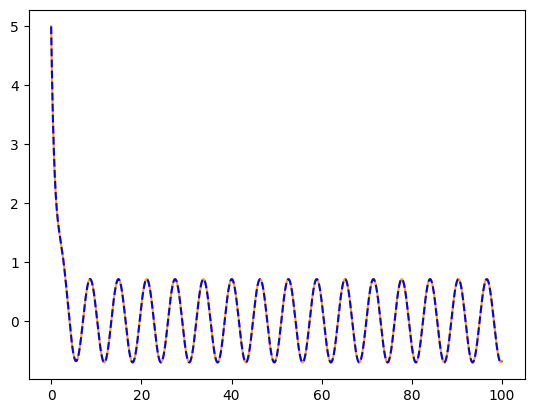

In [39]:
from sympy.core.benchmarks.bench_expand import p

plt.plot(t_eval, y_values, label="Forward Euler", color="orange")
plt.plot(t_eval, y_anal, label="Analytical Solution", color="blue", linestyle="--")

Global error for h=0.1: 3.4157e+00
Global error for h=0.2: 4.0442e+00
Global error for h=0.3: 4.3202e+00
Global error for h=0.4: 4.4793e+00
Global error for h=0.5: 4.5921e+00
Global error for h=0.6: 4.6727e+00
Global error for h=0.7: 4.7384e+00
Global error for h=0.8: 4.7951e+00
Global error for h=0.9: 4.8422e+00
Global error for h=1.0: 4.9503e+00
Global error for h=1.1: 5.4503e+00
Global error for h=1.2: 5.9503e+00
Global error for h=1.3: 6.4503e+00
Global error for h=1.4: 6.9503e+00
Global error for h=1.5: 7.4503e+00
Global error for h=1.6: 7.9503e+00
Global error for h=1.7: 8.4503e+00


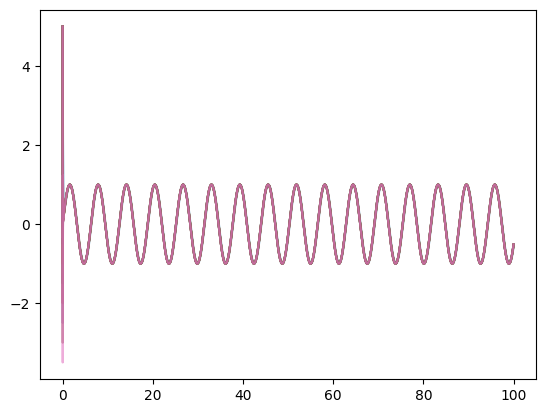

In [54]:
def global_error(y_numerical: ArrayLike, y_analytical: ArrayLike) -> float:
    return np.max(np.abs(y_numerical - y_analytical))


for i in range(1, 18, 1):
    h = i * 0.1
    y_values = np.zeros_like(t_eval)
    y_values[0] = y0
    for i in range(1, len(t_eval)):
        y_values[i] = y_values[i - 1] + h * f(t_eval[i - 1], y_values[i - 1])

    plt.plot(t_eval, y_values, label=f"Forward Euler (h={h})", alpha=0.6)
    error = global_error(y_values, y_anal)
    print(f"Global error for h={h:.1f}: {error:.4e}")